In [8]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec

In [9]:
# Загрузить предобученную модель для детектирования лиц
detector = dlib.get_frontal_face_detector()

# Загрузить предобученную модель для распознавания лиц
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
face_rec_model = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')

In [10]:
def get_face_descriptor(image_path):
    # Загрузить изображение
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 #   plt.imshow(image)

    # Детектировать лица в изображении
    faces = detector(gray)
    print(type(faces))
    
    if len(faces) == 0:
        raise ValueError("Лицо не найдено на изображении.")

    # Предположим, что на изображении только одно лицо
    face = faces[0]

    # Получить координаты ключевых точек лица
    shape = predictor(gray, face)

    # Получить дескриптор лица
    face_descriptor = face_rec_model.compute_face_descriptor(image, shape)

    return (np.array(face_descriptor), faces)

In [11]:
def compare_faces(face_descriptor1, face_descriptor2):
    # Вычислить евклидово расстояние между двумя дескрипторами
    distance = np.linalg.norm(face_descriptor1 - face_descriptor2)
    return distance

In [12]:
def plotter(image_path1, face_rect1,image_path2, face_rect2):
    im1 = cv2.imread(image_path1)
    fig = plt.figure(figsize=(9, 7))
    ws = [100,1,100]
    hs = [1] # 1, 1]
    gs = GridSpec(ncols=3, nrows=1, figure=fig, width_ratios=ws, height_ratios=hs)
    ax1 = plt.subplot(gs[0,0])
    plt.imshow(im1)
    ax1.add_patch (Rectangle((face_rect1.left(), face_rect1.top()), face_rect1.width(), face_rect1.height(), edgecolor='red',
     facecolor='none',
     lw= 4 )) 
    im2 = cv2.imread(image_path2)
    ax2 = plt.subplot(gs[0,2])
    plt.imshow(im2)
    ax2.add_patch (Rectangle((face_rect2.left(), face_rect2.top()), face_rect2.width(), face_rect2.height(), edgecolor='red',
     facecolor='none',
     lw= 4 )) 
    plt.show()

<class '_dlib_pybind11.rectangles'>
<class '_dlib_pybind11.rectangles'>


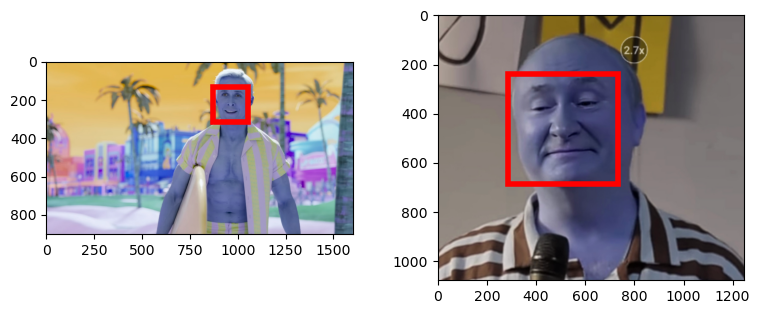

нельзя сказать, что это один человек. Степень различия: 0.652737350274998


In [26]:
# Загрузите изображения лиц
image_path1 = 'gosling 1.jpg'
image_path2 = 'piggy.jpg'

# Получите дескрипторы лиц
descriptor1, face_rect1 = get_face_descriptor(image_path1)
descriptor2, face_rect2 = get_face_descriptor(image_path2)
plotter(image_path1, face_rect1[0],image_path2, face_rect2[0])
# Сравните лица и получите степень схожести
similarity = compare_faces(descriptor1, descriptor2)
if  (similarity<0.6):
    print(f"Скорее всего, это один человек. Степень различия: {similarity}")
else:
    print(f"нельзя сказать, что это один человек. Степень различия: {similarity}")